We already cleaned the data using excel and SQL. 
Here, I'm checking for duplicates in the statecode, callup and cns columns. 
The result is stored in an excel file, duplicate records. 
I am taking a break to catch up with my colleagues on vue JS and also learn how to build a predictive model out of the data. 
I intend to come back to this data later, say early March, to apply what I would have learnt so far in data science. 
There's some extra code at the end, about plotting graphs with matplotlib. Feel free to onlook that or if you so wish, use it to make graphs. The data is in a clean state now so analyze away!
See you later! 

In [1]:
%config IPCompleter.greedy=True

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from collections import namedtuple

In [58]:
#reading my file

df=pd.concat([pd.read_excel("NYSC workable.xlsx", sheet_name=i, index_col= 'index', dtype={"name": str,"statecode": str,"callupno": str, "cns_no": str,"year": str,"full_callup": str})
             for i in range(0,5)], sort = False)

In [59]:
# Checking for duplicate records

dupstatecode=df[df.duplicated("statecode", keep=False)]

dupfullcallup=df[df.duplicated("full_callup", keep=False)]

dupcallup=df[df.duplicated("callupno", keep=False)]

dupcert=df[df.duplicated("cns_no", keep=False)]

print(dupstatecode.any())
print(dupfullcallup.any())
print(dupcallup.any())
print(dupcert.any())


In [45]:
# Writing duplicate records to file

with pd.ExcelWriter ("Duplicated_records.xlsx") as writer: 
    dupstatecode.to_excel(writer, sheet_name = "dupStateCode")
    dupcert.to_excel(writer, sheet_name = "dupCertNum")
    dupcallup.to_excel(writer, sheet_name = "dupCallup")
    dupfullcallup.to_excel(writer, sheet_name = "dupfullcallup")
    

In [60]:
# dropping duplcates from dataframe

print(df.shape)
df2=df.drop_duplicates(subset = ["name","statecode","callupno","cns_no"], keep=False, inplace=False)
print(df2.shape)

(1289773, 11)
(1073751, 11)


In [56]:
# writing dataframe without duplicates to new file

with pd.ExcelWriter ("intNYSC.xlsx") as writer:
    df2[:536875].to_excel(writer, sheet_name="sheet1")
    df2[536875:].to_excel(writer, sheet_name="sheet2")

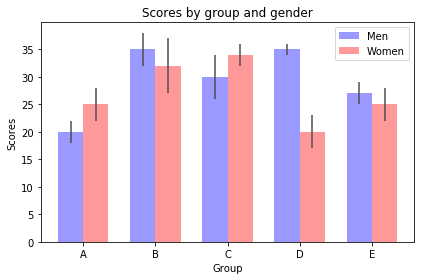

In [2]:
n_groups = 5

means_men = (20, 35, 30, 35, 27)
std_men = (2, 3, 4, 1, 2)

means_women = (25, 32, 34, 20, 25)
std_women = (3, 5, 2, 3, 3)

fig, ax = plt.subplots()

index = np.arange(n_groups)
bar_width = 0.35

opacity = 0.4
error_config = {'ecolor': '0.3'}

rects1 = ax.bar(index, means_men, bar_width,
                alpha=opacity, color='b',
                yerr=std_men, error_kw=error_config,
                label='Men')

rects2 = ax.bar(index + bar_width, means_women, bar_width,
                alpha=opacity, color='r',
                yerr=std_women, error_kw=error_config,
                label='Women')

ax.set_xlabel('Group')
ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(('A', 'B', 'C', 'D', 'E'))
ax.legend()

fig.tight_layout()
plt.show()

In [64]:
new_year = df.groupby('year').size()
year=dict(new_year)

In [65]:
print(year)

{'2010': 170743, '2011': 128506, '2012': 213646, '2013': 200470, '2014': 220957, '2015': 235192, '2016': 120258, '2023': 1}


<BarContainer object of 8 artists>

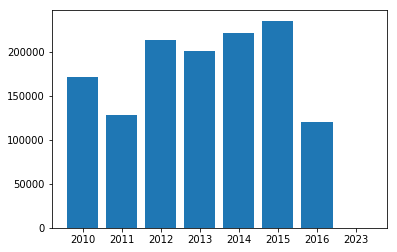

In [66]:
plt.bar(list(year.keys()), list(year.values()), align='center')
